In [2]:
# Importação inicial dos pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração do matplotlib
%matplotlib inline

# Configuração do seaborn
sns.set_style('whitegrid')


In [5]:
# df  = pd.read_csv('winequality.csv')
# del df['Unnamed: 0']
# df.shape
#  lembrei que só pode usar o numpy hahahah achei um desafio interessante


(6497, 13)

In [15]:
array = np.loadtxt('winequality.csv', delimiter=',', skiprows=1)

array = np.delete(array, 0, 1)
array.shape

(6497, 13)

In [17]:
# Verificando se há valores diferentes de numeric
array.dtype.hasobject

False

In [21]:
#  Separar o array em features e target
X = array[:, :12]
y = array[:, 12]
print(X, y)

[[ 5.9   0.61  0.08 ...  0.77 11.1   6.  ]
 [ 8.2   1.    0.09 ...  0.55  9.    6.  ]
 [ 6.4   0.24  0.49 ...  0.98 10.5   6.  ]
 ...
 [ 7.9   0.33  0.28 ...  0.38  8.8   6.  ]
 [ 7.    0.3   0.28 ...  0.57 11.4   5.  ]
 [ 6.4   0.22  0.49 ...  0.52 10.1   6.  ]] [1. 1. 0. ... 0. 0. 0.]


In [22]:
#  Separar o array em treino e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [23]:
# Criar o modelo de Neighbors Classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

# Treinar o modelo
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [24]:
# Fazer previsões
y_pred = knn.predict(X_test)

# Verificar a acurácia
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.955076923076923

Com o KNN obtive 95% com 5 "vizinhos"
Vou tentar otimizar para verificar a curva onde a melhor quantidade de vizinhos é melhor

Text(0, 0.5, 'Acurácia')

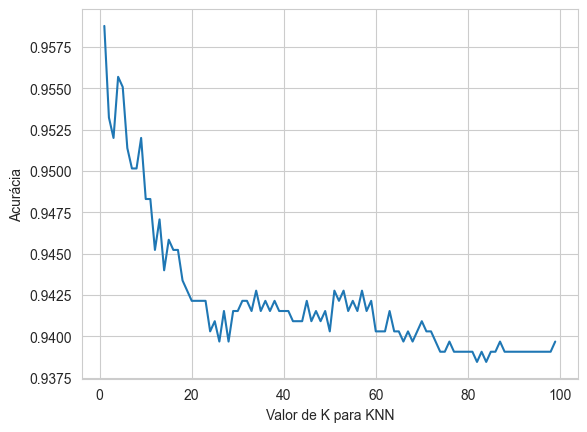

In [29]:
#  Cria loop para testar diferentes valores de K entre 1 e 100
k_range = range(1, 100)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))

#  Plotar o gráfico de acurácia em função de K
plt.plot(k_range, scores)
plt.xlabel('Valor de K para KNN')
plt.ylabel('Acurácia')

Pode-se eperceber que quanto mais pontos próximos, menor a distância, menor o K, mais acertivo é, então decido manter o K como 5 

In [36]:
#  Separar o array para a coluna de qualidade
X_quality = array[:, [*range(0, 11), 12]]
y_quality = array[:, 11]
print(X_quality, y_quality)

[[ 5.9   0.61  0.08 ...  0.77 11.1   1.  ]
 [ 8.2   1.    0.09 ...  0.55  9.    1.  ]
 [ 6.4   0.24  0.49 ...  0.98 10.5   0.  ]
 ...
 [ 7.9   0.33  0.28 ...  0.38  8.8   0.  ]
 [ 7.    0.3   0.28 ...  0.57 11.4   0.  ]
 [ 6.4   0.22  0.49 ...  0.52 10.1   0.  ]] [6. 6. 6. ... 6. 5. 6.]


In [40]:
# Separar o array em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_quality, y_quality)

In [41]:
# Utiliza o mesmo modelo de KNN para prever a qualidade do vinho
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

In [42]:
# Mede a acurácia
accuracy_score(y_test, y_pred)

0.48430769230769233

In [43]:
# Aplica o modelo de Random Forest
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Mede a acurácia
accuracy_score(y_test, y_pred)

0.6806153846153846

Text(0, 0.5, 'Features')

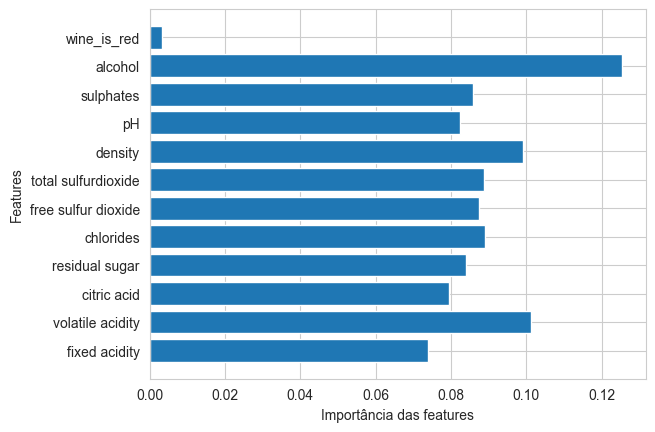

In [44]:
# Plota um gráfico de barras com a importância de cada feature
plt.barh(range(12), rfc.feature_importances_)
plt.yticks(range(12), ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur' 'dioxide','density','pH','sulphates','alcohol','wine_is_red'])
plt.xlabel('Importância das features')
plt.ylabel('Features')


In [46]:
# Normaliza os dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X_quality)

# Separa os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_quality)


In [47]:
# Aplica o modelo de Random Forest
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Mede a acurácia
accuracy_score(y_test, y_pred)

0.6947692307692308

Text(0, 0.5, 'Features')

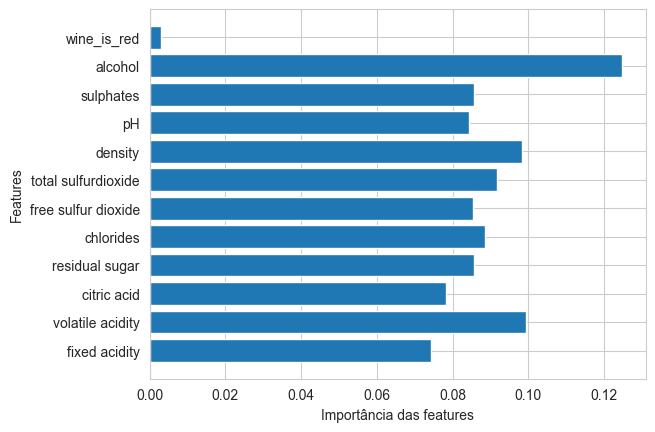

In [48]:
# Plota um gráfico de barras com a importância de cada feature
plt.barh(range(12), rfc.feature_importances_)
plt.yticks(range(12), ['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur' 'dioxide','density','pH','sulphates','alcohol','wine_is_red'])
plt.xlabel('Importância das features')
plt.ylabel('Features')

#  Separa os dados em treino e teste

Aparentemente os fatores de importância não foi alterado com a normalização dos dados, porém, a acurácia foi muito melhor

Text(0, 0.5, 'Frequência')

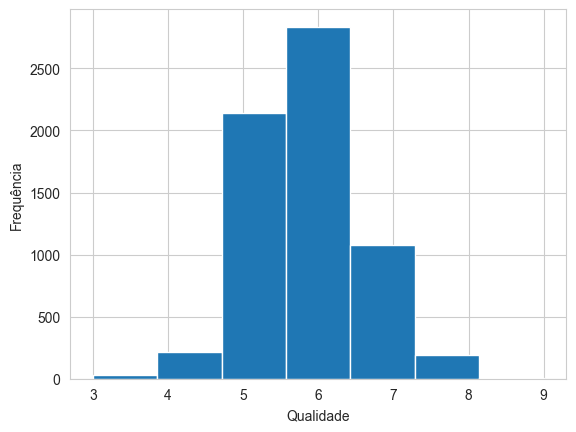

In [50]:
#  Plotando grafico com frequencia de cada valor de qualidade de vinho
plt.hist(y_quality, bins=7)
plt.xlabel('Qualidade')
plt.ylabel('Frequência')



É poissivel ver que a maioria dos vinhos tem qualidade 5 ou 6, e poucos tem qualidade 3 ou 8

Possivelmente tendo um overlap entre 5 e 6, e 6 e 7 e underlap entre 3 e 4, e 7 e 8


In [55]:
# Utilizando a biblioteca imbalance-learn para balancear os dados
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X_scaled, y_quality)

Text(0, 0.5, 'Frequência')

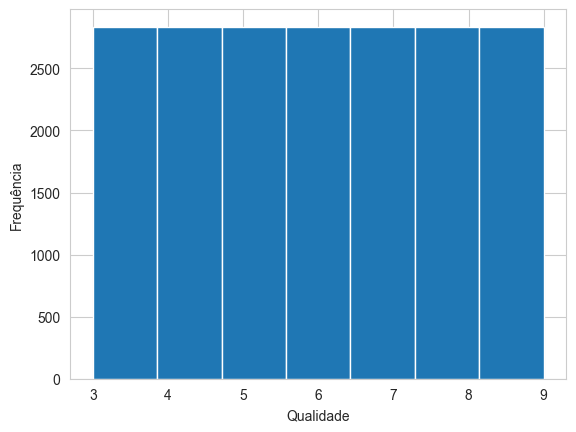

In [56]:
# Plotando gráfico com frequência de cada valor de qualidade de vinho
plt.hist(y_ros, bins=7)
plt.xlabel('Qualidade')
plt.ylabel('Frequência')


In [60]:
# Gostei da distribuição, mas não gosto do fato do RandomOverSampler gerar novos dados a partir de duplicação dos dados existentes
#  Vou testar o SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(k_neighbors=4)
X_smote, y_smote = smote.fit_resample(X_scaled, y_quality)

Text(0, 0.5, 'Frequência')

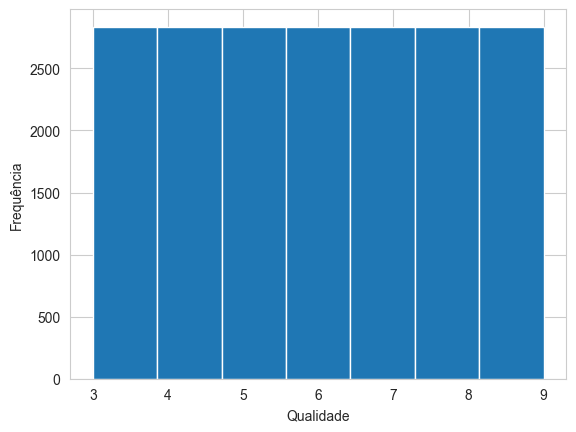

In [61]:
# Plotando gráfico com frequência de cada valor de qualidade de vinho
plt.hist(y_smote, bins=7)
plt.xlabel('Qualidade')
plt.ylabel('Frequência')

In [62]:
# Utiliza o mesmo modelo de Random Forest para prever a qualidade do vinho
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote)
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)
y_pred = rfc.predict(X_test)

# Mede a acurácia
accuracy_score(y_test, y_pred)

0.9012693935119888

CARACA FIQUEI SURPRESO AQUI KKKKKKK
Utilizei o Random Forest que faz um bagging de várias Decision Trees
Mas fiquei curioso e testei outro Ensable Learning hehehe

In [66]:
# Agora ao inves de Random Forestm, vou testar outro ensemble, o HistGradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
hgb = HistGradientBoostingClassifier()
hgb.fit(X_train, y_train)
y_pred = hgb.predict(X_test)

# Mede a acurácia
accuracy_score(y_test, y_pred)

0.8750755591376184

Percebi que em outro ensemble se manteve a média, 

Mas saiu do ~40% com o KNN para 90% após estudar o underlap e overlap

Ansioso para o próximo periodo